In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 537.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=01c8862ccf80e61cda837ccf45d853fbcf42511bd0cadf387b79ce35591607a3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


'''
Variables:
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters

'''

'\nVariables:\n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)\nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters\n\n'

In [3]:
def dim_red(mat, p, method):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM array
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP array
    '''
    if method == 'ACP':
        pca = PCA(n_components=p)
        red_mat = pca.fit_transform(mat)

    return red_mat

In [4]:
def clust(mat, k):
    '''
    Perform clustering using KMeans

    Input:
    -----
        mat : NxP array
        k : number of clusters
    Output:
    ------
        pred : array of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(mat)
    pred = kmeans.labels_

    return pred


In [8]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 20,method="ACP")

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NMI: 0.63 
ARI: 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 2 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 3 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 5 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 6 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 7 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 8 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 9 completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 10 completed


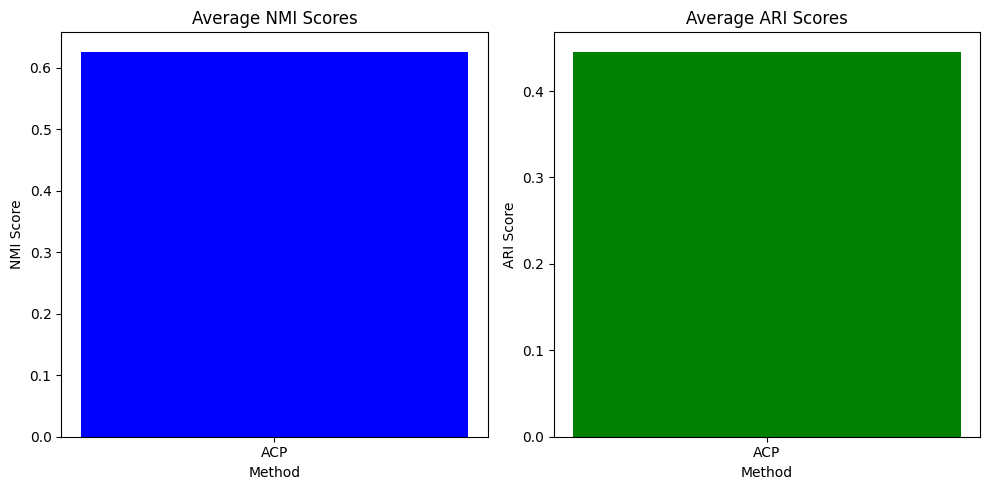

In [9]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Define the methods and number of iterations
methods = ['ACP']
num_iterations = 10  # Number of iterations
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Initialize dictionaries to store the scores
nmi_scores = {method: [] for method in methods}
ari_scores = {method: [] for method in methods}
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data
labels = ng20.target
k = len(set(labels))
# Perform iterations
for iteration in range(num_iterations):
    # Randomly select 2000 samples
    selected_data, selected_labels = shuffle(corpus, labels, n_samples=2000)

    # Generate embeddings for the selected data
    embeddings = model.encode(selected_data)

    # Iterate over each method
    for method in methods:
        # Dimensionality reduction
        red_emb = dim_red(embeddings, 20, method=method)

        # Clustering
        pred = clust(red_emb, k)

        # Evaluate clustering results
        nmi_score = normalized_mutual_info_score(selected_labels, pred)
        ari_score = adjusted_rand_score(selected_labels, pred)

        # Store the scores
        nmi_scores[method].append(nmi_score)
        ari_scores[method].append(ari_score)

    print(f'Iteration {iteration+1} completed')

# Calculate average scores
avg_nmi_scores = [np.mean(nmi_scores[method]) for method in methods]
avg_ari_scores = [np.mean(ari_scores[method]) for method in methods]

# Plotting
plt.figure(figsize=(10, 5))

# NMI Scores
plt.subplot(1, 2, 1)
plt.bar(methods, avg_nmi_scores, color='blue')
plt.title('Average NMI Scores')
plt.xlabel('Method')
plt.ylabel('NMI Score')

# ARI Scores
plt.subplot(1, 2, 2)
plt.bar(methods, avg_ari_scores, color='green')
plt.title('Average ARI Scores')
plt.xlabel('Method')
plt.ylabel('ARI Score')

plt.tight_layout()
plt.show()


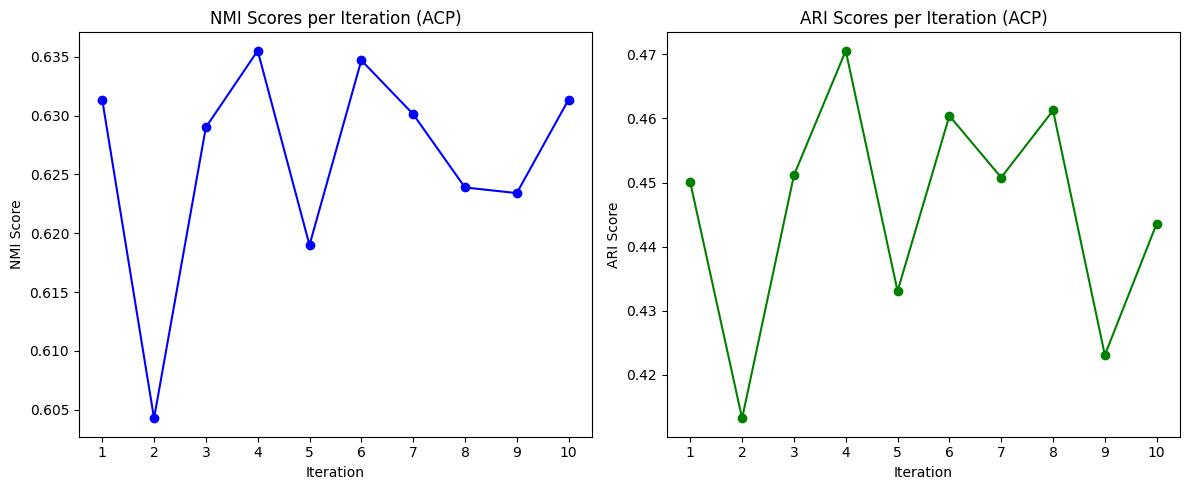

In [12]:
# Plotting
plt.figure(figsize=(12, 5))

# NMI Scores for ACP
plt.subplot(1, 2, 1)
plt.plot(range(1, num_iterations + 1), nmi_scores['ACP'], marker='o', color='blue')
plt.title('NMI Scores per Iteration (ACP)')
plt.xlabel('Iteration')
plt.ylabel('NMI Score')
plt.xticks(range(1, num_iterations + 1))

# ARI Scores for ACP
plt.subplot(1, 2, 2)
plt.plot(range(1, num_iterations + 1), ari_scores['ACP'], marker='o', color='green')
plt.title('ARI Scores per Iteration (ACP)')
plt.xlabel('Iteration')
plt.ylabel('ARI Score')
plt.xticks(range(1, num_iterations + 1))

plt.tight_layout()
plt.show()